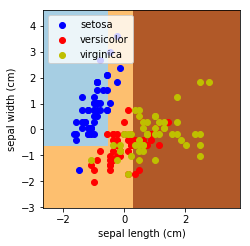

In [13]:
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import pydot
from IPython.display import Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
 
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02
plt.rcParams["figure.figsize"] = [12, 8]
 
# Load data
iris = load_iris()

clf = None
col_names = None

#for pairidx, pair in enumerate([[0, 1]]):
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target
    col_names = [x for i, x in enumerate(iris.feature_names) if i in pair]
 
    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    X = X
    y = y[idx]
 
    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std
 
    # Train
    clf = DecisionTreeClassifier(max_depth=2).fit(X, y)
 
    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis()
 
    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color,
                    label=iris.target_names[i],
                    cmap=plt.cm.Paired)
    plt.axis()

plt.legend(loc="upper left")
plt.show()

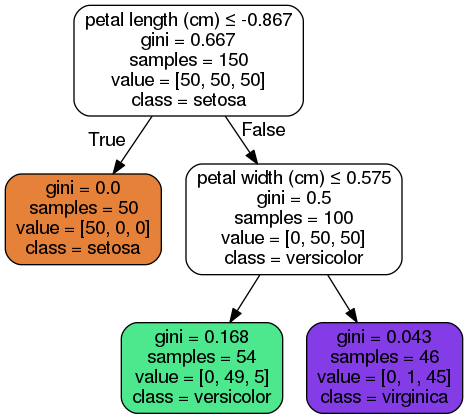

In [11]:
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                     feature_names=col_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  

Image(graph[0].create_png())

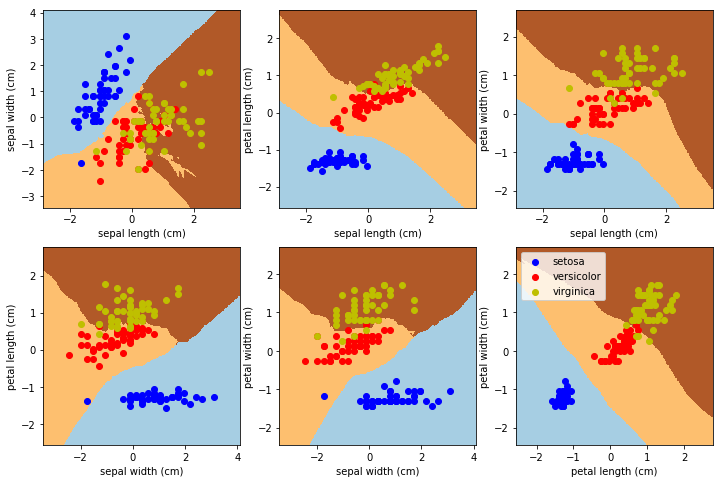

In [34]:
from sklearn.neighbors import KNeighborsClassifier

n_classes = 3
plot_colors = "bry"
plot_step = 0.02
plt.rcParams["figure.figsize"] = [12, 8]

iris = load_iris()

clf = None
col_names = None

#for pairidx, pair in enumerate([[0, 1]]):
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target
    col_names = [x for i, x in enumerate(iris.feature_names) if i in pair]
 
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
 
    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std
 
    clf = KNeighborsClassifier(n_neighbors=10).fit(X, y)
 
    plt.subplot(2, 3, pairidx + 1)
 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis()
 
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color,
                    label=iris.target_names[i],
                    cmap=plt.cm.Paired)
    plt.axis()

plt.legend(loc="upper left")
plt.show()